In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_path="/content/drive/MyDrive/datasets/5Animals"
idg=ImageDataGenerator(
    # rescale= 1./255,
    # rotation_range=20,
    # zoom_range=0.2,
    # horizontal_flip=True,
    validation_split=0.2,
)

dataset_train=idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    # save_to_dir="/content/drive/MyDrive/datasets/animal_aug",
    subset="training",
    target_size=(224,224)
)

dataset_validation=idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="validation",
    target_size=(224,224)
)

Found 1045 images belonging to 5 classes.
Found 258 images belonging to 5 classes.


In [3]:
model= models.Sequential([
    layers.Conv2D(64,(3,3),strides=(2,2),activation="relu", padding="same", input_shape=(224,224,3)),
    layers.Conv2D(64,(3,3),strides=(2,2),activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,(3,3),strides=(1,1),activation="relu", padding="same"),
    layers.Conv2D(128,(3,3),strides=(1,1),activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(256,(3,3),strides=(1,1),activation="relu", padding="same"),
    layers.Conv2D(256,(3,3),strides=(1,1),activation="relu", padding="same"),
    layers.Conv2D(256,(3,3),strides=(1,1),activation="relu", padding="same"),
    layers.MaxPooling2D(),
    # layers.Conv2D(512,(3,3),strides=(1,1),activation="relu", padding="same"),
    # layers.Conv2D(512,(3,3),strides=(1,1),activation="relu", padding="same"),
    # layers.Conv2D(512,(3,3),strides=(1,1),activation="relu", padding="same"),
    # layers.MaxPooling2D(),
    # layers.Conv2D(512,(3,3),strides=(1,1),activation="relu", padding="same"),
    # layers.Conv2D(512,(3,3),strides=(1,1),activation="relu", padding="same"),
    # layers.Conv2D(512,(3,3),strides=(1,1),activation="relu", padding="same"),
    # layers.MaxPooling2D(),

    layers.Flatten(),

    # layers.Dense(4096,activation="relu"),
    layers.Dense(1024,activation="relu"),
    layers.Dense(5,activation="softmax"),
])

In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [5]:
output=model.fit(dataset_train,validation_data=dataset_validation, epochs=20)

Epoch 1/20
33/33 [==============================] - 326s 10s/step - loss: 5.2227 - accuracy: 0.2287 - val_loss: 1.4921 - val_accuracy: 0.4031
Epoch 2/20
33/33 [==============================] - 126s 4s/step - loss: 1.3932 - accuracy: 0.4029 - val_loss: 1.2466 - val_accuracy: 0.4457
Epoch 3/20
33/33 [==============================] - 130s 4s/step - loss: 1.2224 - accuracy: 0.5005 - val_loss: 1.2294 - val_accuracy: 0.4884
Epoch 4/20
33/33 [==============================] - 125s 4s/step - loss: 1.0091 - accuracy: 0.6191 - val_loss: 1.1706 - val_accuracy: 0.5039
Epoch 5/20
33/33 [==============================] - 128s 4s/step - loss: 0.8659 - accuracy: 0.6670 - val_loss: 1.0595 - val_accuracy: 0.5698
Epoch 6/20
33/33 [==============================] - 123s 4s/step - loss: 0.6351 - accuracy: 0.7789 - val_loss: 0.9913 - val_accuracy: 0.5969
Epoch 7/20
33/33 [==============================] - 128s 4s/step - loss: 0.4855 - accuracy: 0.8450 - val_loss: 1.1349 - val_accuracy: 0.5465
Epoch 8/20
3

In [6]:
model.save("weights/animal_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Text(0, 0.5, 'accuracy')

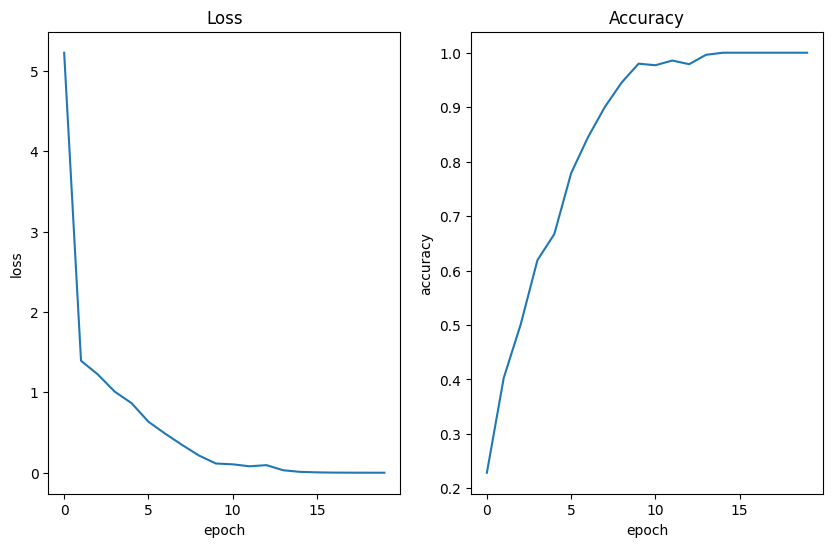

In [7]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
ax1.plot(output.history["loss"])
ax1.set_title("Loss")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax2.plot(output.history["accuracy"])
ax2.set_title("Accuracy")
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")

In [8]:
Y_pred=np.argmax(model.predict(dataset_validation),axis=1)
Y_pred


9/9 [==============================] - 11s 1s/step


array([3, 4, 3, 1, 2, 2, 0, 0, 2, 2, 3, 2, 2, 3, 4, 1, 3, 3, 1, 2, 0, 3,
       1, 4, 1, 0, 1, 1, 2, 4, 1, 2, 3, 4, 2, 0, 4, 4, 4, 0, 1, 1, 1, 0,
       0, 1, 2, 3, 3, 0, 2, 3, 2, 0, 2, 2, 4, 4, 2, 0, 1, 3, 2, 2, 1, 3,
       0, 4, 4, 2, 4, 1, 4, 3, 3, 1, 1, 2, 4, 1, 0, 1, 0, 4, 0, 4, 0, 2,
       1, 3, 4, 3, 4, 1, 4, 1, 3, 1, 4, 1, 3, 3, 3, 3, 2, 2, 1, 1, 4, 1,
       0, 3, 4, 4, 1, 0, 4, 2, 4, 3, 2, 2, 4, 1, 3, 3, 0, 2, 2, 2, 3, 2,
       3, 4, 2, 0, 1, 4, 1, 0, 4, 4, 4, 1, 4, 4, 0, 1, 3, 1, 3, 1, 1, 4,
       3, 4, 0, 1, 2, 4, 1, 1, 4, 3, 1, 2, 3, 3, 4, 4, 0, 2, 0, 2, 0, 2,
       3, 2, 3, 2, 1, 2, 4, 4, 2, 1, 0, 4, 0, 0, 1, 1, 0, 4, 3, 3, 3, 1,
       2, 1, 0, 4, 0, 0, 3, 4, 2, 1, 3, 2, 0, 1, 1, 4, 4, 4, 1, 0, 3, 1,
       3, 0, 3, 4, 3, 1, 4, 4, 1, 2, 0, 4, 4, 0, 0, 2, 0, 3, 1, 2, 3, 0,
       2, 2, 0, 0, 4, 2, 1, 3, 1, 1, 4, 4, 4, 0, 1, 3])

In [9]:
Y_true=(dataset_validation.classes)

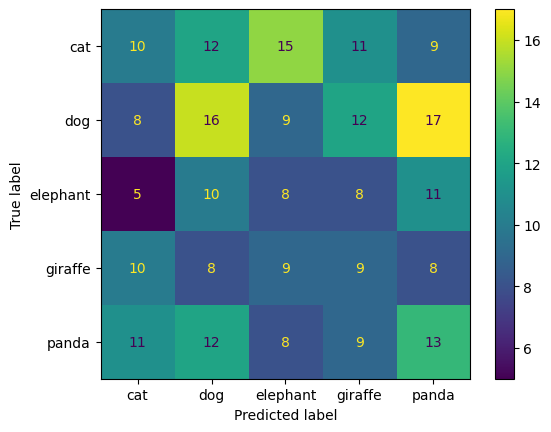

In [10]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(Y_true,Y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["cat", "dog", "elephant", "giraffe", "panda"])

cm_display.plot()
plt.show()

In [19]:
import cv2

# image = cv2.imread("test1.jpg")
image = cv2.imread("/content/drive/MyDrive/datasets/5Animals/dog/(13).jpg")
image.shape
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = cv2.resize(image , (224,224))
image = image / 255.0
image = image.reshape(1,224,224,3)

x = image

output = model.predict(x)
output_class=np.argmax(output)

if output_class==0:
  print("😺")
elif output_class==1:
  print("🐶")
elif output_class==2:
  print("🐘")
elif output_class==3:
  print("🦒")
elif output_class==4:
  print("🐼")

ValueError: ignored